Importing Libraries

In [67]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_squared_error,r2_score
from math import ceil



Loading the dataset

In [68]:
df=pd.read_csv("student_data.csv")
df.info

<bound method DataFrame.info of     school sex  age address famsize Pstatus  Medu  Fedu      Mjob      Fjob  \
0       GP   F   18       U     GT3       A     4     4   at_home   teacher   
1       GP   F   17       U     GT3       T     1     1   at_home     other   
2       GP   F   15       U     LE3       T     1     1   at_home     other   
3       GP   F   15       U     GT3       T     4     2    health  services   
4       GP   F   16       U     GT3       T     3     3     other     other   
..     ...  ..  ...     ...     ...     ...   ...   ...       ...       ...   
390     MS   M   20       U     LE3       A     2     2  services  services   
391     MS   M   17       U     LE3       T     3     1  services  services   
392     MS   M   21       R     GT3       T     1     1     other     other   
393     MS   M   18       R     LE3       T     3     2  services     other   
394     MS   M   19       U     LE3       T     1     1     other   at_home   

     ... famrel fre

In [69]:
df.head(10)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
5,GP,M,16,U,LE3,T,4,3,services,other,...,5,4,2,1,2,5,10,15,15,15
6,GP,M,16,U,LE3,T,2,2,other,other,...,4,4,4,1,1,3,0,12,12,11
7,GP,F,17,U,GT3,A,4,4,other,teacher,...,4,1,4,1,1,1,6,6,5,6
8,GP,M,15,U,LE3,A,3,2,services,other,...,4,2,2,1,1,1,0,16,18,19
9,GP,M,15,U,GT3,T,3,4,other,other,...,5,5,1,1,1,5,0,14,15,15


Train_Test_Split

In [70]:
random_seed=0
X=df.drop('G3',axis=1)
y=df['G3']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_seed)


Checking the shape of dataframes

In [71]:
print(f"Shape of features: {X.shape}")
print(f"Shape of target: {y.shape}")

Shape of features: (395, 32)
Shape of target: (395,)


Printing heads of X_train and y_train

In [72]:
X_train.head()


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2
64,GP,F,15,U,LE3,T,4,3,services,services,...,yes,4,4,4,2,4,2,0,10,10
55,GP,F,16,U,GT3,A,2,1,other,other,...,yes,5,3,4,1,1,2,8,8,9
343,GP,F,17,U,GT3,A,2,2,at_home,at_home,...,yes,3,3,1,1,2,4,0,9,8
219,GP,F,17,U,GT3,T,2,2,at_home,at_home,...,no,4,3,3,1,1,4,4,9,10
366,MS,M,18,U,LE3,T,4,4,teacher,services,...,yes,4,2,2,2,2,5,0,13,13


In [73]:
y_train.head()

64     10
55     10
343     0
219    10
366    13
Name: G3, dtype: int64

Plotting the columns G1,G2,G3 in histogram for checking the distribution of dataie shape and spread of the data

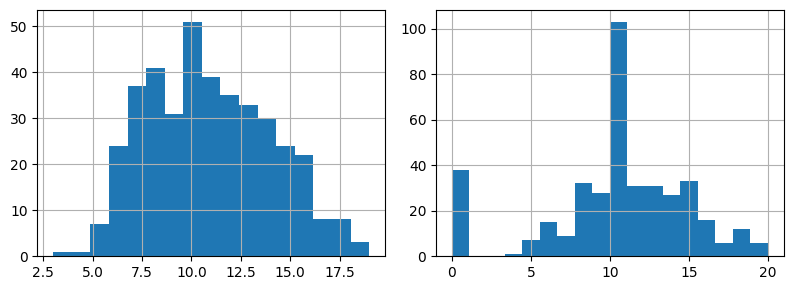

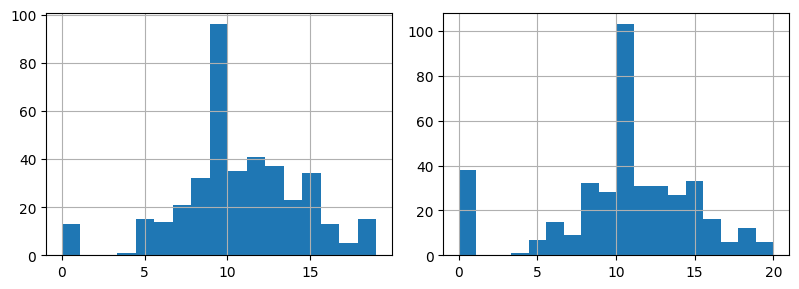

In [74]:
def plot_hist(df,ncols=5):
    n=len(df.columns)
    nrows=ceil(n/ncols)
    fig_width=ncols*4
    fig_height=nrows*3
    fig=plt.figure(figsize=(fig_width,fig_height))
    for idex,col in enumerate(df.columns):
        plt.subplot(nrows,ncols,idex+1)
        df[col].hist(bins=len(df[col].unique()))
    plt.tight_layout()
    plt.show()
plot_hist(df[["G1","G3"]])
plot_hist(df[["G2","G3"]])

Scatter plot to analyze the relationship of the input features with target

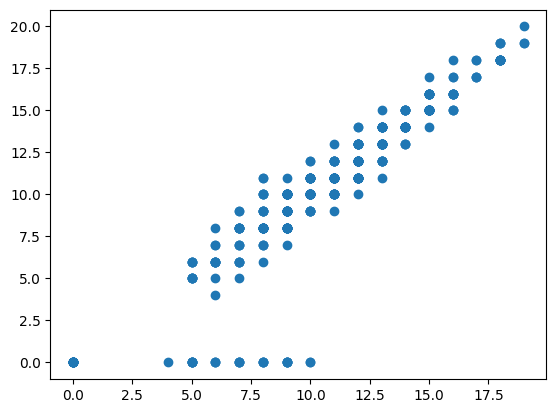

In [80]:
plt.scatter(df["G2"], df["G3"])

plt.show()

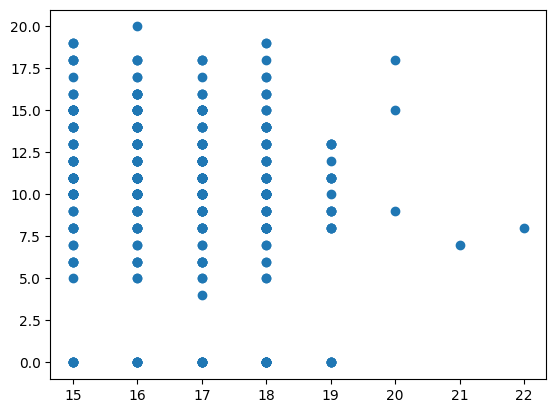

In [81]:
plt.scatter(df["age"],df["G3"])


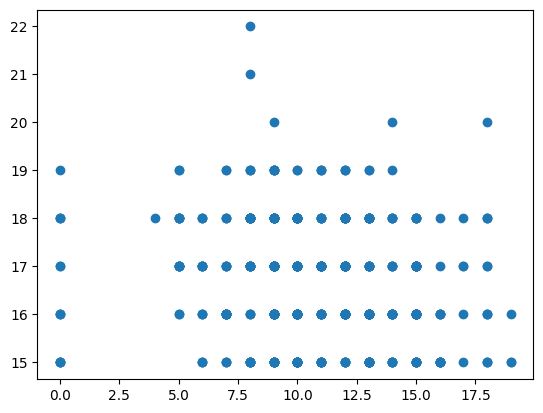

In [82]:

plt.scatter(df["G2"],df["age"] )

Finding Correlations that have strong correlated with G3 between the features available

In [ ]:
import seaborn as sns
train_df=X_train.copy()
train_df['target']=y_train

Keeping only numeric columns for correlation

In [ ]:
numeric_df=train_df.select_dtypes(include="number")
corr=numeric_df.corr()
corr

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,target
age,1.000000,-0.120597,-0.137954,0.078509,0.000539,0.251180,0.080118,-0.027769,0.135113,0.153406,0.116700,-0.103278,0.206206,-0.073597,-0.151435,-0.184941
Medu,-0.120597,1.000000,0.603734,-0.143049,0.069322,-0.251036,-0.010770,-0.013791,0.043828,0.029430,-0.033898,-0.023482,0.066430,0.204240,0.241738,0.238431
Fedu,-0.137954,0.603734,1.000000,-0.119495,-0.004380,-0.237401,-0.011739,-0.043636,0.008321,-0.022042,-0.034396,0.028085,-0.002180,0.195066,0.185396,0.157221
traveltime,0.078509,-0.143049,-0.119495,1.000000,-0.148742,0.088883,-0.026458,0.021580,0.070676,0.185211,0.154222,0.019385,0.005889,-0.107945,-0.196920,-0.162337
studytime,0.000539,0.069322,-0.004380,-0.148742,1.000000,-0.132508,0.066455,-0.125374,-0.054021,-0.194273,-0.261497,-0.059869,-0.085996,0.189458,0.170523,0.147663
failures,0.251180,-0.251036,-0.237401,0.088883,-0.132508,1.000000,-0.021525,0.040045,0.105880,0.183081,0.144469,0.048405,0.135052,-0.316670,-0.307376,-0.318010
famrel,0.080118,-0.010770,-0.011739,-0.026458,0.066455,-0.021525,1.000000,0.173941,0.040793,-0.078983,-0.133022,0.114186,-0.059182,0.009230,-0.036221,0.008938
freetime,-0.027769,-0.013791,-0.043636,0.021580,-0.125374,0.040045,0.173941,1.000000,0.268132,0.222440,0.134224,0.097586,-0.041266,-0.008778,-0.013879,-0.005170
goout,0.135113,0.043828,0.008321,0.070676,-0.054021,0.105880,0.040793,0.268132,1.000000,0.264680,0.416135,-0.033526,0.088483,-0.125416,-0.139429,-0.125001
Dalc,0.153406,0.029430,-0.022042,0.185211,-0.194273,0.183081,-0.078983,0.222440,0.264680,1.000000,0.644777,0.094769,0.136286,-0.094863,-0.074430,-0.069196


Plotting the heatmap for correlation matrix

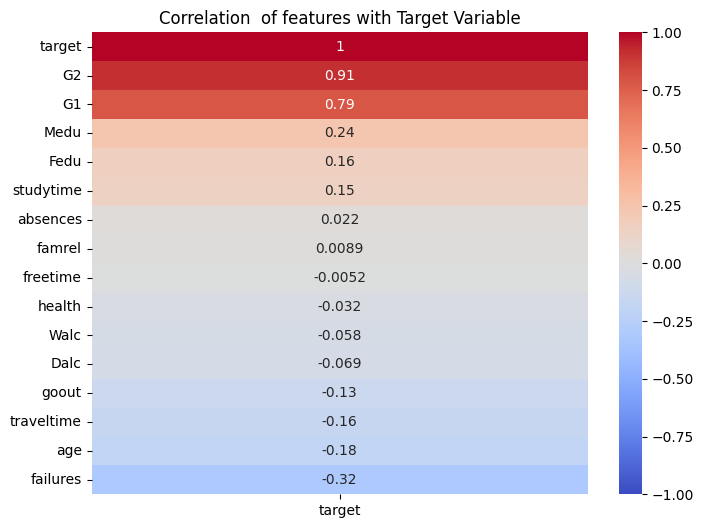

In [ ]:

plt.figure(figsize=(8,6))
sns.heatmap(
    corr[["target"]].sort_values(by="target",ascending=False),
    annot=True, 
    cmap="coolwarm",
    vmin=-1,
    vmax=1
)
plt.title("Correlation  of features with Target Variable")
plt.show()

Printing the list of top five features that have strong correlation with target value variable

In [83]:
top_5_features=(corr["target"].drop("target").abs().sort_values(ascending=False)).index[:5].tolist()
print(top_5_features)

['G2', 'G1', 'failures', 'Medu', 'age']


Fitting a linear Regression model on Top five Features

In [84]:
regr_num_top5=LinearRegression()
regr_num_top5.fit(X_train[top_5_features],y_train)
Theta=regr_num_top5.coef_
intercept=regr_num_top5.intercept_
print(Theta)
print(intercept)

[ 0.98998101  0.10226152 -0.15467828  0.04511651 -0.1587905 ]
1.3686594683658821


Making predictions on the test set

In [85]:
y_pred=regr_num_top5.predict(X_test[top_5_features])
print(f"Shape of predicted values: {y_pred.shape}")

Shape of predicted values: (79,)


Model Evaluation using root mean sqare error(rmse)

In [ ]:
from sklearn.metrics import mean_squared_error as mse, mean_absolute_error as mae
rmse=np.sqrt(mse(y_test,y_pred))
print(f"MAE: {mae(y_test,y_pred)}")
print(f"RMSE: {rmse}")

MAE: 1.3296474215488832
RMSE: 2.339786416840782


Converting categorical strings into numerical value

In [89]:
from sklearn.preprocessing import LabelEncoder

def preprocess(df):
    numeric = [
        'age', 'traveltime', 'Medu', 'Fedu', 'studytime', 'failures', 'famrel', 
        'freetime', 'goout', 'Dalc', 'Wallc', 'health', 'absences', 'G1', 'G2'
    ]
    
    cat_nominal = ['Mjob', 'Fjob', 'reason', 'guardian']
    
    cat_binary = [
        'school', 'sex', 'address', 'famsize', 'Pstatus', 'schoolsup', 
        'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic'
    ]
    df[cat_binary] = df[cat_binary].apply(LabelEncoder().fit_transform)
    df=pd.get_dummies(df,columns=cat_nominal,prefix=cat_nominal)
    return df
X_train,X_test=preprocess(X_train),preprocess(X_test)
X_train.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,traveltime,studytime,...,Fjob_other,Fjob_services,Fjob_teacher,reason_course,reason_home,reason_other,reason_reputation,guardian_father,guardian_mother,guardian_other
64,0,0,15,1,1,1,4,3,1,2,...,False,True,False,False,False,False,True,True,False,False
55,0,0,16,1,0,0,2,1,1,2,...,True,False,False,False,False,True,False,False,True,False
343,0,0,17,1,0,0,2,2,1,2,...,False,False,False,False,True,False,False,True,False,False
219,0,0,17,1,0,1,2,2,1,3,...,False,False,False,True,False,False,False,False,True,False
366,1,1,18,1,1,1,4,4,2,3,...,False,True,False,False,False,True,False,False,True,False


In [90]:
regr_all = LinearRegression(fit_intercept=True)
regr_all.fit(X_train, y_train)
Theta = regr_all.coef_
intercept = regr_all.intercept_

In [91]:
print(Theta)
print(intercept)

[ 0.5238824   0.24330965 -0.23144012  0.11061871  0.2007116  -0.1378263
  0.19191588 -0.1977475   0.04158589  0.02818863 -0.1649842   0.63663808
  0.11962371  0.22213286 -0.35062741 -0.30510997  0.42981382 -0.28631374
 -0.2982708   0.22792286 -0.01919731 -0.00238898 -0.2085704   0.1358237
  0.11304189  0.0675726   0.15570049  0.96356108  0.03420265 -0.08739704
  0.11623723 -0.04156183 -0.02148101 -0.24629725  0.24966888 -0.01513229
  0.14762419 -0.13586353  0.06829193 -0.35230252  0.42153572 -0.13752513
  0.00566913  0.08768447 -0.09335361]
0.5184099837229237


In [92]:
y_pred = regr_all.predict(X_test)
mae_value = mae(y_test, y_pred)
mse_value = mse(y_test, y_pred)
rmse_value = np.sqrt(mse(y_test, y_pred))

print("mae", mae_value)
print("mse: ", mse_value)
print("rmse: ", rmse_value)

mae 1.6103326329571042
mse:  5.845190390646958
rmse:  2.417682855679578


Create a baseline model that always predicts the mean of the data used in training.

Calculate the root mean squared error and mean absolute error using baseline model.


In [93]:
from sklearn.dummy import DummyRegressor

base_model = DummyRegressor(strategy='mean')
base_model.fit(X_train, y_train)

y_pred_base = base_model.predict(X_test)

rmse_base = np.sqrt(mse(y_pred_base, y_test))
mse_base = mse(y_pred_base, y_test)
mae_base = mae(y_pred_base, y_test)

# To see the baseline results:
print("Baseline MAE:", mae_base)
print("Baseline MSE:", mse_base)
print("Baseline RMSE:", rmse_base)

Baseline MAE: 4.120573626021471
Baseline MSE: 27.67733536292261
Baseline RMSE: 5.260925333334679
